<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Есть-ли-взаимосвязь-между-размером-мозга-интеллектом-?" data-toc-modified-id="Есть-ли-взаимосвязь-между-размером-мозга-интеллектом-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Есть ли взаимосвязь между размером мозга интеллектом ?</a></span></li><li><span><a href="#Есть-ли-различия-в-выборе-авто-между-мужчинами-и-женщинами?" data-toc-modified-id="Есть-ли-различия-в-выборе-авто-между-мужчинами-и-женщинами?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Есть ли различия в выборе авто между мужчинами и женщинами?</a></span></li></ul></div>

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

from tqdm import tqdm

In [2]:
%matplotlib inline

# Есть ли взаимосвязь между размером мозга интеллектом ?

In [3]:
data = pd.read_csv(os.path.join('data', '4', 'brain.tsv'), delimiter='\t')
data.head(5)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [4]:
data.shape

(40, 7)

In [5]:
def plot_column(data, name):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(15, 5)
    
    plt_data_1 = data[data['Gender']=='Female'][name]
    plt_data_2 = data[data['Gender']=='Male'][name]
    ax1.plot(plt_data_1.index, plt_data_1, 'ro')
    ax1.plot(plt_data_2.index, plt_data_2, 'bo')
    ax1.set_title('{} data'.format(name))
    ax2.boxplot(data[name])
    
    data[name].hist()
    ax3.set_title('{} hist'.format(name))
    
def describe_column(data, name):
    plot_column(data, name)
    data = data[name]
    description = pd.DataFrame(data.describe()).transpose().set_index([pd.Index([name])])
    mode = data.mode()    
    description['mode'] = mode[0] if len(mode) == 1 else 'not one mode'
    description['range'] = description['max'] - description['min']
    return description

,count,mean,std,min,25%,50%,75%,max,mode,range
PIQ,40.0,111.025,22.47105,72.0,88.25,115.0,128.0,150.0,124,78.0


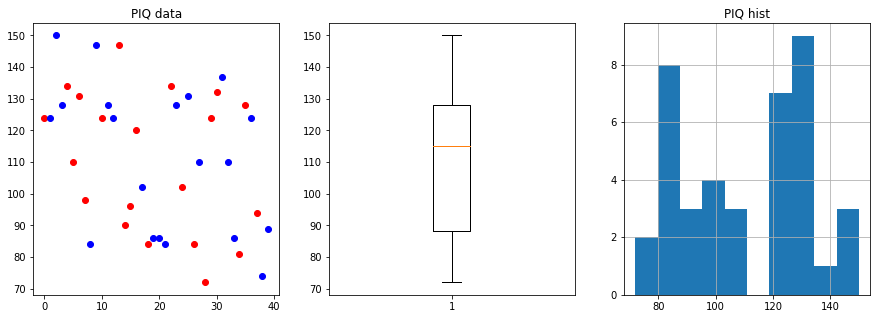

In [6]:
describe_column(data, 'PIQ')

,count,mean,std,min,25%,50%,75%,max,mode,range
MRI_Count,40.0,908755.0,72282.048931,790619.0,855918.5,905399.0,950078.0,1079549.0,not one mode,288930.0


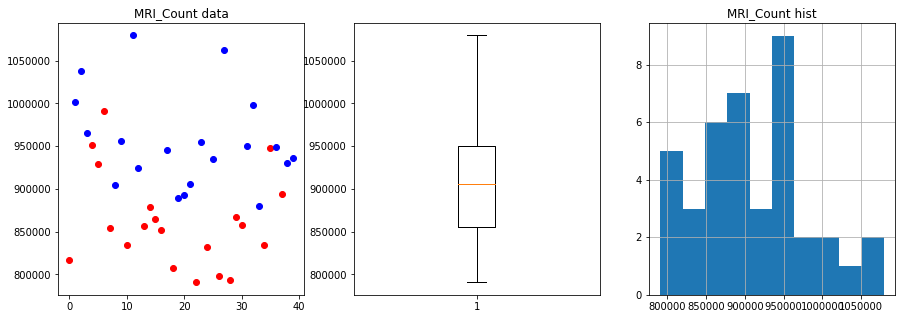

In [7]:
describe_column(data, 'MRI_Count')

In [8]:
def plot_correlation(data, name_1, name_2):
    plt_data_1 = data[data['Gender']=='Female']
    plt_data_2 = data[data['Gender']=='Male']

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(15, 5)
    ax1.plot(plt_data_1[name_1], plt_data_1[name_2], 'ro')
    ax2.plot(plt_data_2[name_1], plt_data_2[name_2], 'bo')
    ax1.set_title('Female')
    ax2.set_title('Male')
    ax1.set_ylabel(name_1)
    ax1.set_xlabel(name_2)
    ax2.set_xlabel(name_2)
    
    ax3.plot(data[name_1], data[name_2], 'ko')
    ax3.set_title('Both')
    ax3.set_xlabel(name_2)

    lib_arts_r = pearsonr(plt_data_1[name_1], plt_data_1[name_2])
    univ_r = pearsonr(plt_data_2[name_1], plt_data_2[name_2])
    both_r = pearsonr(data[name_1], data[name_2])
    index = pd.Index(['Female', 'Male', 'Both'])
    return pd.DataFrame([lib_arts_r,univ_r, both_r], columns=['R', 'p-value']).set_index([index]).transpose()

,Female,Male,Both
R,0.396157,0.568237,0.386817
p-value,0.083781,0.008950,0.013675


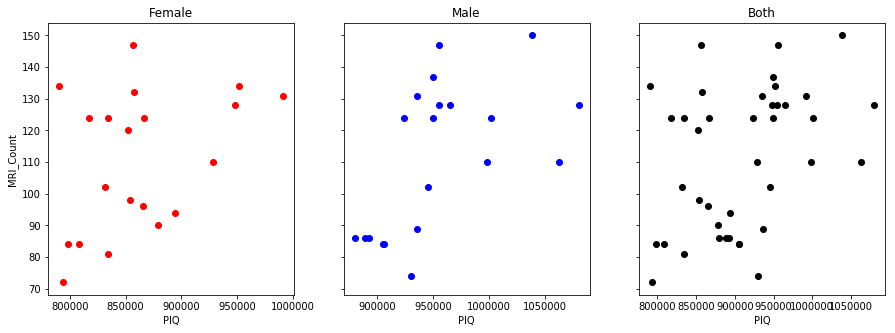

In [9]:
plot_correlation(data, 'MRI_Count', 'PIQ')

Был рассчитан коэффициент корреляции между размером головного мозга и интеллектом. Во всех случаях наблюдается положительная, хоть и не высокая корреляция, т.е. поспешно можно сделать вывод о наличии взаимосвязи между этими показателями у всех людей (мужчин/женщин). Однако рассчитанные согласно [Критерию Фишера](https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L2445) p-value показывают, что вероятность ошибиться при подобного рода обобщении достаточно велика (больше 0.001 в каждом случае и больше 0.01 в случае Женщин и смешанной выборки).

# Есть ли различия в выборе авто между мужчинами и женщинами?

In [10]:
data = pd.read_csv(os.path.join('data', '4', 'carprefs.tsv'), delimiter='\t')
data.head(5)

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [11]:
data.shape

(300, 22)

Необходимо применить критерий "хи-квадрат" для анализа таблиц сопряженности, поэтому воспользуемся [scipy.stats.chi2_contingency](https://github.com/scipy/scipy/blob/v0.15.1/scipy/stats/contingency.py#L110)

In [12]:
tb = pd.crosstab(data['Sex'], data['PreferCar'])

In [13]:
tb

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


In [14]:
chi2, prob, df, expected = sts.chi2_contingency(tb.values)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, df, prob))
critical_value = sts.chi2.ppf(0.99, df)
print('Критическое значение для уровня значимости 99% - {}'.format(critical_value))
print('{}'.format('Отвергаем H0: выбор зависит от гендера' if critical_value < chi2 else 'Принимаем H0:, выбор НЕ зависит от гендера'))

test Statistics: 17.507847808569526
degrees of freedom: 3
p-value: 0.0005555699275518034

Критическое значение для уровня значимости 99% - 11.344866730144373
Отвергаем H0: выбор зависит от гендера


Вероятность ошибочно отклонить гипотезу о том, что наблюдаемые частоты независимы - крайне мала (0.0005555699275518034), следовательно можно сделать вывод о зависимости выбора автомобиля от гендера выбирающего. Таким образом, на вопрос "есть ли различия в выборе авто между мужчинами и женщинами?", можно ответить: различия есть.